In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train.csv", index_col="Loan_ID")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Boolean Index
--------------

In [4]:
data.loc[(data["Gender"] == "Female") & (data["Education"] == "Not Graduate") & (data["Loan_Status"] == "Y"),\
         ["Gender", "Education", "Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


Apply Function
------------------

In [7]:
def num_missing(x):
    return sum(x.isnull())

# apply by column
print data.apply(num_missing, axis=0).head()

# apply by row
print data.apply(num_missing, axis=1).head()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
dtype: int64
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


Fill the missing value
------------------------

In [11]:
from scipy.stats import mode
print data['Gender'].head()
mode(data['Gender'])

Loan_ID
LP001002    Male
LP001003    Male
LP001005    Male
LP001006    Male
LP001008    Male
Name: Gender, dtype: object


ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [9]:
mode(data['Gender']).mode[0]

'Male'

Fill the missing value

In [12]:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

In [13]:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Pivot table
------------

In [15]:
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender", "Married", "Self_Employed"],\
                               aggfunc=np.mean)
print impute_grps

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


Combined index
---------------


In [ ]:
data.loc[data['LoanAmount'].isnull(), :]

In [17]:
# iterate only through rows with missing LoanAmount
for i, row in data.loc[data['LoanAmount'].isnull(), :].iterrows():
    ind = tuple([row['Gender'], row['Married'], row['Self_Employed']])
    data.loc[i, 'LoanAmount'] = impute_grps.loc[ind].values[0]

print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [22]:
impute_grps.loc[('Male', 'No', 'Yes')]

array([ 180.58823529])

Crosstab
-----------

In [23]:
pd.crosstab(data['Credit_History'], data["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,192,422,614


In [24]:
def percentConvert(ser):
    return ser/float(ser[-1])

In [25]:
pd.crosstab(data["Credit_History"], data["Loan_Status"], margins=True).apply(percentConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.312704,0.687296,1.0


Combine DataFrame
------------------

In [26]:
prop_rate = pd.DataFrame([1000, 5000, 12000], \
                         index=['Rural', 'Semiurban', 'Urban'], columns=['rate'])
prop_rate

,rate
Rural,1000
Semiurban,5000
Urban,12000


In [29]:
data_merged = data.merge(right=prop_rate, how='inner', left_on='Property_Area', right_index=True, sort=False)
print data_merged.head()
data_merged.pivot_table(values='Credit_History', index=['Property_Area', 'rate'], aggfunc=len)

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   
LP001011   Male     Yes          2      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0  129.936937             360.0   
LP001005             3000                0.0   66.000000             360.0   
LP001006             2583             2358.0  120.000000             360.0   
LP001008             6000                0.0  141.000000             360.0   
LP001011             5417             4196.0  267.000000             

Property_Area  rate 
Rural          1000     179.0
Semiurban      5000     233.0
Urban          12000    202.0
Name: Credit_History, dtype: float64

Sort DataFrames
---------------

In [30]:
data_sorted = data.sort_values(['ApplicantIncome', 'CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome', 'CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


Boxplot & Histogram Function
--------------------------------

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

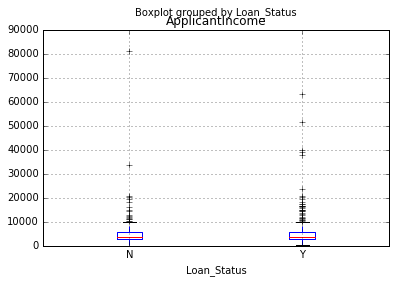

In [32]:
data.boxplot(column="ApplicantIncome", by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119adb410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119baf410>], dtype=object)

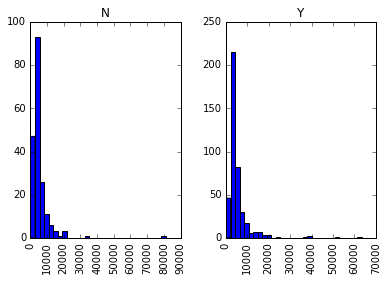

In [33]:
data.hist(column="ApplicantIncome", by="Loan_Status", bins=30)

Use cut to bin
------------------------

In [34]:
#Binning
def binning(col, cut_points, labels=None):
    #Define min and max values
    minval=col.min()
    maxval=col.max()
    
    #create list by adding min and max to cutpoints
    break_points = [minval] + cut_points + [maxval]
    
    #if no labels provided, use default labels 0...(n-1)
    if not labels:
        labels = xrange(len(cut_points) + 1)
        
    #Binning using cut function of pandas
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

In [36]:
# Binning age:
cut_points = [90, 140, 190]
labels = ["low", "medium", "high", "very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)

low          104
medium       273
high         146
very high     91
dtype: int64


Coding for categorical variable
------------------------------

In [37]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.iteritems():
        colCoded.replace(key, value, inplace=True)
    return colCoded

In [39]:
print "Before Coding"
print pd.value_counts(data['Loan_Status'])
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0, 'Y':1})
print "After Coding"
print pd.value_counts(data['Loan_Status_Coded'])

Before Coding
Y    422
N    192
Name: Loan_Status, dtype: int64
After Coding
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


Iterate through the row data in DataFrame
------------------------------------------

In [40]:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

In [43]:
colTypes = pd.DataFrame({'feature' : pd.Series(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]), \
                        'type' : pd.Series(['categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'continuous', 'continuous', 'countinous', 'countinous', 'categorical', 'categorical', 'categorical'])})
print colTypes

              feature         type
0              Gender  categorical
1             Married  categorical
2          Dependents  categorical
3           Education  categorical
4       Self_Employed  categorical
5     ApplicantIncome   continuous
6   CoapplicantIncome   continuous
7          LoanAmount   countinous
8    Loan_Amount_Term   countinous
9      Credit_History  categorical
10      Property_Area  categorical
11        Loan_Status  categorical


In [44]:
for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
print data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object
